## Central Limit Theorem

The Central Limit Theorem (CLT) is a fundamental principle in probability and statistics. It states that, given certain conditions, the average (or sum) of a large number of independent, identically distributed (i.i.d.) random variables approaches a normal (i.e., Gaussian) distribution, **no matter** the shape of the original distribution.

### Mathematical Statement
For i.i.d. random variables $X_1, X_2, ..., X_n$ with (population) mean $\mu$ and (population) variance $\sigma^2$:
$$\frac{\bar{X} - \mu}{\sigma/\sqrt{n}} \xrightarrow{d} N(0, 1) \text{ as } n \to \infty$$

where $\bar{X} = \frac{1}{n}\sum_{i=1}^{n}X_i$ is the sample mean.

In practice, we can also express the distribution of the sample mean as:
$$\bar{X} \sim N(\mu, \frac{\sigma^2}{n})$$

### Key Implications:
1. The distribution of the sample mean becomes approximately normal
2. The standard error decreases with $\sqrt{n}$ (larger samples → more precise estimates)
3. Rule of thumb: CLT typically applies well when n ≥ 30

### The "certain conditions" are:

* **Independence**: The random variables must be independent. This means that the outcome of one observation does not influence the outcome of another observation. In many practical scenarios, this assumption is satisfied by random sampling.

* **Identically Distributed**: The random variables should be identically distributed, often abbreviated as i.i.d. This means that each random variable has the same probability distribution as the others and the same parameters. In simpler terms, all variables come from the same "population".

* **Finite Mean and Variance**: Each of the random variables must have a finite mean 
($\mu$) and variance ($\sigma^2$). This means that extremely long-tailed distributions or distributions with no defined mean or variance may not conform to the CLT.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import ttest_ind
from tqdm import tqdm

# set random seed
np.random.seed(42)

Let's run some simulations to see CLT in action, with samples drawing from different distributions.

In [2]:
from ipywidgets import interact, IntSlider
import ipywidgets as widgets

def demonstrate_clt(distribution="uniform", sample_size=30, n_simulations=1_000):
    """Interactive demonstration of CLT with different distributions and sample sizes."""

    sample_means = []

    for _ in range(n_simulations):
        if distribution == "uniform":
            X = np.random.uniform(0, 1, size=sample_size)
            theoretical_mean = 0.5
            theoretical_var = 1 / 12
        elif distribution == "exponential":
            X = np.random.exponential(scale=1, size=sample_size)
            theoretical_mean = 1
            theoretical_var = 1
        elif distribution == "binomial":
            X = np.random.binomial(n=10, p=0.3, size=sample_size)
            theoretical_mean = 3
            theoretical_var = 2.1
        else:
            raise ValueError(f"Unsupported distribution: {distribution}")

        sample_means.append(np.mean(X))

    theoretical_std = np.sqrt(theoretical_var / sample_size)

    plt.figure(figsize=(10, 5))

    # Plot histogram
    plt.hist(
        sample_means,
        bins=30,
        density=True,
        alpha=0.7,
        edgecolor="black",
        label=f"Sample means (n={sample_size})"
    )

    # Overlay theoretical normal
    x = np.linspace(min(sample_means), max(sample_means), 100)
    plt.plot(
        x,
        norm.pdf(x, theoretical_mean, theoretical_std),
        "r-",
        linewidth=2,
        label=f"Theoretical N({theoretical_mean:.2f}, {theoretical_std:.3f}²)"
    )

    plt.title(f"CLT Demo: {distribution.capitalize()} Distribution")
    plt.xlabel("Sample Mean")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Create interactive widget
interact(
    demonstrate_clt,
    distribution=widgets.Dropdown(options=["uniform", "exponential", "binomial"],
                                value="uniform",
                                description="Distribution:"),
    sample_size=IntSlider(min=5, max=200, step=5, value=30,
                        description="Sample Size:"),
    n_simulations=IntSlider(min=100, max=5000, step=100, value=1000,
                                description="Simulations:")
)

interactive(children=(Dropdown(description='Distribution:', options=('uniform', 'exponential', 'binomial'), va…

<function __main__.demonstrate_clt(distribution='uniform', sample_size=30, n_simulations=1000)>

## Point estimation and confidence interval

Point estimation refers to the process of using sample data to compute a single value, known as a statistic, which serves as the "best guess" or "best estimate" of an unknown population parameter (like the population mean or population proportion). For example, the sample mean is such a statistic, and the it is used as the point estimation (point estimate) of the population mean.

While point estimation gives a specific value as an estimate, it doesn't convey anything about the degree of certainty or possible margin of error associated with the estimate. This is where confidence intervals come into play.

A confidence interval provides a range of values, derived from the point estimate and the associated variability of the estimate, within which the true population parameter is expected to fall with a certain probability (confidence level).

## Example: Estimating the population mean

Let's run some simulation to demonstrate the concept. 

Below, we assume that we already know the population parameter: the population mean. For the sake of demonstration, we will repeatedly sample from the population, for `n_trials` (e.g., 100) trials. For each sampling, we draw `n_samples` (e.g., 100) samples. Therefore, we will have 100 sample means. 

For each of the trials, we can construct the point estimation of the population mean (i.e., using the sample mean), and the 95%confidence interval (CI). We will see that, there are chances, that the 95% CI does not include the population mean.

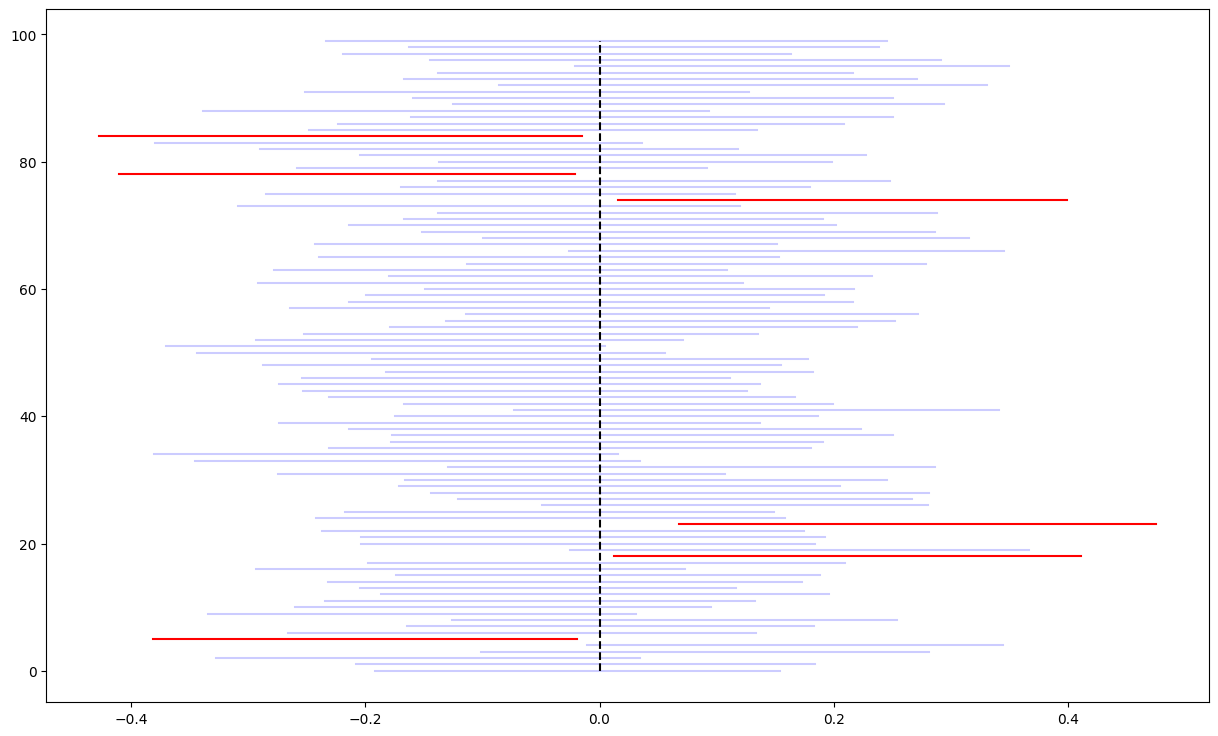

In [3]:
mu = 0  # population mean
sigma = 1

n_trials = 100
n_samples = 100
results = []
for i, _ in enumerate(range(n_trials)):
    X = np.random.normal(loc=mu, scale=sigma**0.5, size=n_samples)  # Sampling
    lower_bound = np.mean(X) - 1.96 * np.std(X, ddof=1) / np.sqrt(n_samples)
    upper_bound = np.mean(X) + 1.96 * np.std(X, ddof=1) / np.sqrt(n_samples)

    results.append((i, lower_bound, upper_bound))

plt.figure(figsize=(15, 9))
for i, lower, upper in results:
    if lower > mu or upper < mu:
        plt.plot([lower, upper], [i] * 2, color="red", alpha=1)
    else:
        plt.plot([lower, upper], [i] * 2, color="blue", alpha=0.2)
plt.plot([mu] * len(results), list(range(len(results))), "k--")
plt.show()